# Intoduction

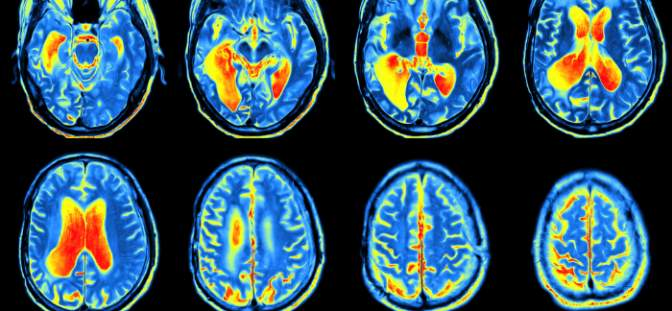

Human brain research is among the most complex areas of study for scientists. We know that age and other factors can affect its function and structure, but more research is needed into what specifically occurs within the brain. With much of the research using MRI scans, data scientists are well positioned to support future insights. In particular, neuroimaging specialists look for measurable markers of behavior, health, or disorder to help identify relevant brain regions and their contribution to typical or symptomatic effects.

In this competition, you will predict multiple assessments plus age from multimodal brain MRI features. You will be working from existing results from other data scientists, doing the important work of validating the utility of multimodal features in a normative population of unaffected subjects. Due to the complexity of the brain and differences between scanners, generalized approaches will be essential to effectively propel multimodal neuroimaging research forward.

In this challenge, participants will predict age and assessment values from two domains using features derived from brain MRI images as inputs.

Models are expected to generalize on data from a different scanner/site (site 2). All subjects from site 2 were assigned to the test set, so their scores are not available. While there are fewer site 2 subjects than site 1 subjects in the test set, the total number of subjects from site 2 will not be revealed until after the end of the competition. To make it more interesting, the IDs of some site 2 subjects have been revealed below. Use this to inform your models about site effects. Site effects are a form of bias. To generalize well, models should learn features that are not related to or driven by site effects.

# Importing all necessary packages

In [ ]:
!wget https://github.com/Chaogan-Yan/DPABI/raw/master/Templates/ch2better.nii

In [ ]:
import numpy as np # linear algebra
import nilearn as nl
import nilearn.plotting as nlplt
import nibabel as nib
import h5py
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
mask_filename = '../input/trends-assessment-prediction/fMRI_mask.nii'
subject_filename = '../input/trends-assessment-prediction/fMRI_train/10004.mat'
smri_filename = 'ch2better.nii'
mask_niimg = nl.image.load_img(mask_filename)

def load_subject(filename, mask_niimg):
    """
    Load a subject saved in .mat format with
        the version 7.3 flag. Return the subject
        niimg, using a mask niimg as a template
        for nifti headers.
        
    Args:
        filename    <str>            the .mat filename for the subject data
        mask_niimg  niimg object     the mask niimg object used for nifti headers
    """
    subject_data = None
    with h5py.File(subject_filename, 'r') as f:
        subject_data = f['SM_feature'][()]
    # It's necessary to reorient the axes, since h5py flips axis order
    subject_data = np.moveaxis(subject_data, [0,1,2,3], [3,2,1,0])
    subject_niimg = nl.image.new_img_like(mask_niimg, subject_data, affine=mask_niimg.affine, copy_header=True)
    return subject_niimg
subject_niimg = load_subject(subject_filename, mask_niimg)
print("Image shape is %s" % (str(subject_niimg.shape)))
num_components = subject_niimg.shape[-1]
print("Detected {num_components} spatial maps".format(num_components=num_components))

# Nilearn Visualizations

In [ ]:
nlplt.plot_prob_atlas(subject_niimg, bg_img=smri_filename, view_type='filled_contours', draw_cross=False, title='All %d spatial maps' % num_components, threshold='auto')


In [ ]:
grid_size = int(np.ceil(np.sqrt(num_components)))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size*10, grid_size*10))
[axi.set_axis_off() for axi in axes.ravel()]
row = -1
for i, cur_img in enumerate(nl.image.iter_img(subject_niimg)):
    col = i % grid_size
    if col == 0:
        row += 1
    nlplt.plot_stat_map(cur_img, bg_img=smri_filename, title="IC %d" % i, axes=axes[row, col], threshold=3, colorbar=False)


In [ ]:
import matplotlib.pyplot as plt

from nilearn import datasets
haxby_dataset = datasets.fetch_haxby()   # load dataset

# print basic information on the dataset
print('First subject anatomical nifti image (3D) is at: %s' %
      haxby_dataset.anat[0])
print('First subject functional nifti image (4D) is at: %s' %
      haxby_dataset.func[0])  # 4D data

# Build the mean image because we have no anatomic data
from nilearn import image
func_filename = haxby_dataset.func[0]
mean_img = image.mean_img(func_filename)

z_slice = -14

fig = plt.figure(figsize=(4, 5.4), facecolor='k')

from nilearn.plotting import plot_anat, show
display = plot_anat(mean_img, display_mode='z', cut_coords=[z_slice],
                    figure=fig)
mask_vt_filename = haxby_dataset.mask_vt[0]
mask_house_filename = haxby_dataset.mask_house[0]
mask_face_filename = haxby_dataset.mask_face[0]
display.add_contours(mask_vt_filename, contours=1, antialiased=False,
                     linewidths=4., levels=[0], colors=['red'])
display.add_contours(mask_house_filename, contours=1, antialiased=False,
                     linewidths=4., levels=[0], colors=['blue'])
display.add_contours(mask_face_filename, contours=1, antialiased=False,
                     linewidths=4., levels=[0], colors=['limegreen'])

# We generate a legend using the trick described on
# http://matplotlib.sourceforge.net/users/legend_guide.httpml#using-proxy-artist
from matplotlib.patches import Rectangle
p_v = Rectangle((0, 0), 1, 1, fc="red")
p_h = Rectangle((0, 0), 1, 1, fc="blue")
p_f = Rectangle((0, 0), 1, 1, fc="limegreen")
plt.legend([p_v, p_h, p_f], ["vt", "house", "face"])

show()

In [ ]:
from nilearn import datasets

# haxby dataset to have EPI images and masks
haxby_dataset = datasets.fetch_haxby()

# print basic information on the dataset
print('First subject anatomical nifti image (3D) is at: %s' %
      haxby_dataset.anat[0])
print('First subject functional nifti image (4D) is at: %s' %
      haxby_dataset.func[0])  # 4D data

haxby_anat_filename = haxby_dataset.anat[0]
haxby_mask_filename = haxby_dataset.mask_vt[0]
haxby_func_filename = haxby_dataset.func[0]

# one motor contrast map from NeuroVault
motor_images = datasets.fetch_neurovault_motor_task()
stat_img = motor_images.images[0]

In [ ]:
from nilearn import plotting

# Visualizing t-map image on EPI template with manual
# positioning of coordinates using cut_coords given as a list
plotting.plot_stat_map(stat_img,
                       threshold=3, title="plot_stat_map",
                       cut_coords=[36, -27, 66])

In [ ]:
view = plotting.view_img(stat_img, threshold=3)
# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view

In [ ]:
plotting.plot_glass_brain(stat_img, title='plot_glass_brain',
                          threshold=3)

In [ ]:
plotting.plot_anat(haxby_anat_filename, title="plot_anat")

In [ ]:
plotting.plot_roi(haxby_mask_filename, bg_img=haxby_anat_filename,
                  title="plot_roi")

In [ ]:
# Import image processing tool
from nilearn import image

# Compute the voxel_wise mean of functional images across time.
# Basically reducing the functional image from 4D to 3D
mean_haxby_img = image.mean_img(haxby_func_filename)

# Visualizing mean image (3D)
plotting.plot_epi(mean_haxby_img, title="plot_epi")

In [ ]:

# haxby dataset to have anatomical image, EPI images and masks
#haxby_dataset = datasets.fetch_haxby()
haxby_anat_filename = haxby_dataset.anat[0]
haxby_mask_filename = haxby_dataset.mask_vt[0]
haxby_func_filename = haxby_dataset.func[0]

# localizer dataset to have contrast maps
motor_images = datasets.fetch_neurovault_motor_task()
stat_img = motor_images.images[0]

In [ ]:
plotting.plot_stat_map(stat_img, display_mode='ortho',
                       cut_coords=[36, -27, 60],
                       title="display_mode='ortho', cut_coords=[36, -27, 60]")



In [ ]:
plotting.plot_stat_map(stat_img, display_mode='z', cut_coords=5,
                       title="display_mode='z', cut_coords=5")

In [ ]:
plotting.plot_stat_map(stat_img, display_mode='x',
                       cut_coords=[-36, 36],
                       title="display_mode='x', cut_coords=[-36, 36]")

In [ ]:
plotting.plot_stat_map(stat_img, display_mode='y', cut_coords=1,
                       title="display_mode='y', cut_coords=1")

In [ ]:
plotting.plot_stat_map(stat_img, display_mode='z',
                       cut_coords=1, colorbar=False,
                       title="display_mode='z', cut_coords=1, colorbar=False")

In [ ]:
plotting.plot_stat_map(stat_img, display_mode='xz',
                       cut_coords=[36, 60],
                       title="display_mode='xz', cut_coords=[36, 60]")

In [ ]:
plotting.plot_stat_map(stat_img, display_mode='yx',
                       cut_coords=[-27, 36],
                       title="display_mode='yx', cut_coords=[-27, 36]")

In [ ]:
plotting.plot_stat_map(stat_img, display_mode='yz',
                       cut_coords=[-27, 60],
                       title="display_mode='yz', cut_coords=[-27, 60]")

In [ ]:
plotting.plot_stat_map(stat_img, display_mode='tiled',
                       cut_coords=[36, -27, 60],
                       title="display_mode='tiled'")

In [ ]:
from nilearn import image

# Compute voxel-wise mean functional image across time dimension. Now we have
# functional image in 3D assigned in mean_haxby_img
mean_haxby_img = image.mean_img(haxby_func_filename)

In [ ]:
display = plotting.plot_anat(mean_haxby_img, title="add_edges")

# We are now able to use add_edges method inherited in plotting object named as
# display. First argument - anatomical image  and by default edges will be
# displayed as red 'r', to choose different colors green 'g' and  blue 'b'.
display.add_edges(haxby_anat_filename)

In [ ]:
# As seen before, we call the `plot_anat` function with a background image
# as first argument, in this case again the mean fMRI image and argument
# `cut_coords` as list for manual cut with coordinates pointing at masked
# brain regions
display = plotting.plot_anat(mean_haxby_img, title="add_contours",
                             cut_coords=[-34, -39, -9])
# Now use `add_contours` in display object with the path to a mask image from
# the Haxby dataset as first argument and argument `levels` given as list
# of values to select particular level in the contour to display and argument
# `colors` specified as red 'r' to see edges as red in color.
# See help on matplotlib.pyplot.contour to use more options with this method
display.add_contours(haxby_mask_filename, levels=[0.5], colors='r')



In [ ]:
display = plotting.plot_anat(mean_haxby_img,
                             title="add_contours with filled=True",
                             cut_coords=[-34, -39, -9])

# By default, no color fillings will be shown using `add_contours`. To see
# contours with color fillings use argument filled=True. contour colors are
# changed to blue 'b' with alpha=0.7 sets the transparency of color fillings.
# See help on matplotlib.pyplot.contourf to use more options given that filled
# should be True
display.add_contours(haxby_mask_filename, filled=True, alpha=0.7,
                     levels=[0.5], colors='b')

In [ ]:
display = plotting.plot_anat(mean_haxby_img, title="add_markers",
                             cut_coords=[-34, -39, -9])

# Coordinates of seed regions should be specified in first argument and second
# argument `marker_color` denotes color of the sphere in this case yellow 'y'
# and third argument `marker_size` denotes size of the sphere
coords = [(-34, -39, -9)]
display.add_markers(coords, marker_color='y', marker_size=100)

In [ ]:
display = plotting.plot_anat(mean_haxby_img,
                             title="adding a scale bar",
                             cut_coords=[-34, -39, -9])
display.annotate(scalebar=True)

In [ ]:
display = plotting.plot_anat(mean_haxby_img,
                             title="adding a scale bar",
                             cut_coords=[-34, -39, -9])
display.annotate(scalebar=True, scale_size=25, scale_units='mm')

# Brain Development Functional Datasets

In [ ]:
from nilearn import datasets

rest_dataset = datasets.fetch_development_fmri(n_subjects=20)
func_filenames = rest_dataset.func
confounds = rest_dataset.confounds


In [ ]:
# Import dictionary learning algorithm from decomposition module and call the
# object and fit the model to the functional datasets
from nilearn.decomposition import DictLearning

# Initialize DictLearning object
dict_learn = DictLearning(n_components=8, smoothing_fwhm=6.,
                          memory="nilearn_cache", memory_level=2,
                          random_state=0)
# Fit to the data
dict_learn.fit(func_filenames)
# Resting state networks/maps in attribute `components_img_`
# Note that this attribute is implemented from version 0.4.1.
# For older versions, see the note section above for details.
components_img = dict_learn.components_img_

# Visualization of functional networks
# Show networks using plotting utilities
from nilearn import plotting

plotting.plot_prob_atlas(components_img, view_type='filled_contours',
                         title='Dictionary Learning maps')

In [ ]:
# Import Region Extractor algorithm from regions module
# threshold=0.5 indicates that we keep nominal of amount nonzero voxels across all
# maps, less the threshold means that more intense non-voxels will be survived.
from nilearn.regions import RegionExtractor

extractor = RegionExtractor(components_img, threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=1350)
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

# Visualization of region extraction results
title = ('%d regions are extracted from %d components.'
         '\nEach separate color of region indicates extracted region'
         % (n_regions_extracted, 8))
plotting.plot_prob_atlas(regions_extracted_img, view_type='filled_contours',
                         title=title)

In [ ]:
# First we need to do subjects timeseries signals extraction and then estimating
# correlation matrices on those signals.
# To extract timeseries signals, we call transform() from RegionExtractor object
# onto each subject functional data stored in func_filenames.
# To estimate correlation matrices we import connectome utilities from nilearn
from nilearn.connectome import ConnectivityMeasure

correlations = []
# Initializing ConnectivityMeasure object with kind='correlation'
connectome_measure = ConnectivityMeasure(kind='correlation')
for filename, confound in zip(func_filenames, confounds):
    # call transform from RegionExtractor object to extract timeseries signals
    timeseries_each_subject = extractor.transform(filename, confounds=confound)
    # call fit_transform from ConnectivityMeasure object
    correlation = connectome_measure.fit_transform([timeseries_each_subject])
    # saving each subject correlation to correlations
    correlations.append(correlation)

# Mean of all correlations
import numpy as np
mean_correlations = np.mean(correlations, axis=0).reshape(n_regions_extracted,
                                                          n_regions_extracted)

In [ ]:
title = 'Correlation between %d regions' % n_regions_extracted

# First plot the matrix
display = plotting.plot_matrix(mean_correlations, vmax=1, vmin=-1,
                               colorbar=True, title=title)

# Then find the center of the regions and plot a connectome
regions_img = regions_extracted_img
coords_connectome = plotting.find_probabilistic_atlas_cut_coords(regions_img)

plotting.plot_connectome(mean_correlations, coords_connectome,
                         edge_threshold='90%', title=title)

In [ ]:
# First, we plot a network of index=4 without region extraction (left plot)
from nilearn import image

img = image.index_img(components_img, 4)
coords = plotting.find_xyz_cut_coords(img)
display = plotting.plot_stat_map(img, cut_coords=coords, colorbar=False,
                                 title='Showing one specific network')

In [ ]:
# For this, we take the indices of the all regions extracted related to original
# network given as 4.
regions_indices_of_map3 = np.where(np.array(regions_index) == 4)

display = plotting.plot_anat(cut_coords=coords,
                             title='Regions from this network')

# Add as an overlay all the regions of index 4
colors = 'rgbcmyk'
for each_index_of_map3, color in zip(regions_indices_of_map3[0], colors):
    display.add_overlay(image.index_img(regions_extracted_img, each_index_of_map3),
                        cmap=plotting.cm.alpha_cmap(color))

plotting.show()

# Modeling

Modeling will be done soon 

Be stay tuned and upvote if you like this notebook 